## The SingularityNet Simulation Marketplace Tutorial

The SingularityNET simulation repository is a tool used both by SingularityNET and the community to propose and compare designs of the network.
At the same time, it is also a general analysis tool.
As a miniature SingularityNET, it is a coevolutionary seat through which feedback can be delivered between ordinary software programs, including artificial intelligence programs and models.
Of course, how much these ordinary programs accept and adjust to feedback depends on their internal flexibility, but many programs at least have a few parameters with which they can adjust to each other, towards particular use cases.
Agents learn to do whatever make their customers happy, and when multiple customers use multiple measures they are less able to game any one measurement.
The signals of usefulness to customers "backpropagates" (and "forwardpropagates") to the software agents through the price signal, and the price equilibriates to a point which is an assignment of credit for the AI.
The SingularityNET marketplace is thus like a big self organizing neural network, except one with a flexible architecture.

In the first SingularityNET [simulation tutorial](simulation.ipynb) we examined the knowledge representation for Genetic Programming in Python, and went over simulation cycles of trade proposals and acceptances on a blackboard.
This second notebook demonstrates coevolutionary market dynamics in a series of market scenarios, the final one building optimized software, an analysis usecase.
In that use case, we present the process of choosing the kind of vector space and clusterer, and their parameterizatons, for a particular dataset.
This fulfils an unmet need, as the parametrization of unsupervised learning techniques usually requires tedious human labor.
It is also more efficient than the combinatorial search a human might use, as well as for saving every intermediate pickle so that no processing is wasted.

Vector space optimization cannot be done without human input in the form of either a labeled set or a visual checking, but here the vector space improves based on what makes a client clusterer score higher on tests.
Any one of these tests is not a perfect indicator of a clusterer's quality, but in combination with tests their customers take, and those customers' customers, etc, make a good measurement of performance, and one that is less likely to be gamed.
Eventually, with small amounts of selective pressure emanating throughout the agent ecosystem, humans would no longer have to look at the results.
The clusterer improves the more diverse its customers are.
These customers could include, for example, models that increase their fit to data, the better their input clusterers are. 

We present the CMA-ES "SISTER" agents for this demonstration.
The agents are SISTERs, in the sense that each learn to read and display signs to communicate with other SISTER agents, in order to hold implicit information about the types of emergent software that is generated. 
This process creates implicit ontological categories that indicate whatever it is about their software that makes their customers succeed.
These customers and software form emergent groupings, or roles, which have similar products indicated by similar signs.
Such groupings are essential for optimizing the focus of selective pressure.
Groupings are mediated through signs.
Agents are CMA-ES in that they each have an entire CMA-ES algorithm to learn their trade plans, and if they are SISTER agents, also their signs.
However, any other algorithm may be put into agents to learn their trade plans, and these may be mixed with SISTER and other agents, and all of these operating on a variety of software.

One may question, how is it that coevolutionary agents can be designed to serve an entire ecosystem?
Wouldn't it be too hard for an agent to come up with all of the combinations of software and parameters for software?
Yes, but the coevolutionary dynamics can support complexification -we anticipate that some of the problems in the ecosystem will be easier, pre-adapting agents for when they need to tackle harder problems.
Because it will take time for such coincidences to arise in the SingularityNET simulation when used as an analysis tool, we offer the ability to hold some things still and let the rest evolve around it, in a form of templating.
As we shall see, being able to hold things still makes a great tool for science as well.  

First, we place agents in the bullpen to test their ability to give and accept feedback in the market, by testing the law of supply and demand.
We compare prices between two scenarios: 
1. OHTB: One Human and Two Bots
2. THOB: Two Humans and One Bot

The sole agent in these scenarios is rarer than the other type of agent, and therefore should have control over the price.

First, let's look at the OHTB scenario parameters in the config file [onehumantwobots.json](onehumantwobots.json).
During processing, this config JSON file is automatically stored in the output directory, for future analysis purposes.

In [1]:
import json
with open('onehumantwobots.json') as json_file:  
    config = json.load(json_file)
    print(json.dumps(config['parameters'], indent=2))

{
  "label": "one human two bots",
  "output_path": "onehumantwobots/",
  "sign_size": 8,
  "num_trade_plans": 10,
  "item_size": 8,
  "num_tests": 5,
  "min_token_price": 1,
  "max_token_price": 100,
  "max_iterations": 10000,
  "chance_of_stop_codon": 0.1,
  "seed": 55,
  "stochastic_copies": 1,
  "recursive_trade_depth_limit": 10,
  "buyers_weight": 0.5,
  "agent_parameters": {
    "SISTER": {
      "sigma": 0.4,
      "elitist": false,
      "fitness_weights": {
        "agi_tokens": 1,
        "buyer_score": 150,
        "seller_score": 100
      }
    },
    "Exogenous": {}
  },
  "random_agents": {},
  "blackboard_agents": [
    1,
    2,
    0,
    0,
    0
  ]
}


In this case we have zero random agents: there are no free-form agents that start from a random float vector and contain any of the software in any order.
We also have no exogenous agents: agents that do not learn, but just put out predetermined trade messages on the blackboard.
An exogenous agent is good for representing real world data, or for implementing what other agents have learned in a lighter weight scenario.
`Sigma` and `elitist` are CMA-ES parameters, the learning algorithm that the SISTER agents use.
We also see that fitness is weighted: `buyer_score` is the score on the tests that the buyer uses, and represents the utility of the item that the buyer bought.
The buyer's utility can go negative if he pays too much for an item that turns out to have a low buyer score.

From the agents on the blackboard, this scenario uses one of the first type (a human), and two of the second type (bots):

In [2]:
print(json.dumps(config['blackboard'], indent=2))

[
  {
    "type": "SISTER",
    "distributes": true,
    "label": "Cluster Seeking Human",
    "trades": [
      {
        "type": "buy",
        "item": "clusterer_stop",
        "tests": [
          {
            "stophere": false,
            "test": "test_clusterer_silhouette",
            "data": "data_freetext_short",
            "threshold": 0.5,
            "hidden": false
          },
          {
            "stophere": true
          }
        ]
      },
      {
        "type": "stop"
      }
    ]
  },
  {
    "type": "SISTER",
    "distributes": false,
    "label": "Does everything but poorly",
    "trades": [
      {
        "type": "sell",
        "item": "clusterer_nltk_kmeans_20clusters",
        "tests": [
          {
            "stophere": true,
            "test": "test_clusterer_silhouette",
            "data": "data_freetext_internetResearchAgencyTweets",
            "hidden": false
          },
          {
            "stophere": true
          }
        ]
      

There is one human, the first agent, which is different from the bot in that it actually "distributes" funds, and just buys something.
The stop codon in its order means that the underlying program will not continue to evolve out what kind of cluster it wants.

The second type of agent is held to sell a specific item, constructed in a specific way.
However, note that we do not denote the price (by default, it stays in the variable's "midpoint", meaning the lowest price a seller will sell and the highest price a buyer will buy).
So, the price is the only thing that evolves, and running the scenario for thirty thousand iterations shows the equillibrium price, that is, the compromise that takes place between seller and buyer.

We now proceed to run the simulation.
First, we need to generate an instance of the `SnetSim` class, specifying the JSON configuration file we want to use.
During initialization, an empty reproduction report and a copy of the config file are created.

The simulation starts when calling the `go()` method.
The `reproduction_report` is updated, and pickle and log files are created.
The log files include results, and can be used to restart runs. 

You can use the following cell for all of your runs, only replacing the name of the configuration file in the SnetSim object, for exploration on your own (uncomment `snetsim.go()` if you want to run the simulation).

In [3]:
import simulation
# Generate an instance of the SnetSim class
snetsim = simulation.SnetSim('onehumantwobots.json')
# Run the simulation
# snetsim.go()

(12_w,25)-aCMA-ES (mu_w=7.3,w_1=23%) in dimension 1148 (seed=560146, Mon Apr  6 12:58:36 2020)
IN SISTER init,Cluster Seeking Human, SISTER Agent 0
(12_w,25)-aCMA-ES (mu_w=7.3,w_1=23%) in dimension 1148 (seed=418796, Mon Apr  6 12:58:36 2020)
IN SISTER init,Does everything but poorly, SISTER Agent 1
(12_w,25)-aCMA-ES (mu_w=7.3,w_1=23%) in dimension 1148 (seed=425276, Mon Apr  6 12:58:36 2020)
IN SISTER init,Does everything but poorly, SISTER Agent 2
Initialized SnetSim instance!


Above we see that three CMA-ES agents have been created, using the `cma` package.
We use the ask-tell interface, meaning that we have control of the program and not CMA-ES.
Mesa, the agent based simulation in control, has mechanisms for multiple runs, but these results are consistent, as you can tell by repeatedly running the cell with a different seed in the parameter section of the config file.

Let's examine a single run closely: first we load the reproduction report of a previously run simulation. 
For example, we see that the human agent has paid 37.9 tokens for software that satisfies him 0.53.
Because of the fitness weights in the parameters, this gives him a net utility of 41.89 .  

In [5]:
import pandas as pd
repro = pd.read_csv("onehumantwobotsSigma4/reproduction_report.csv", delimiter=";")
repro.head ()

,time,agent,label,utility,agi_tokens,buyer_score,seller_score,sign_displayed
0,0.0,0,"Cluster Seeking Human, SISTER Agent 0",0.000000,0.00000,0.000000,0.0,"[0.093108286671858, 0.9716559199897875, 0.4838..."
1,0.0,2,"Does everything but poorly, SISTER Agent 2",0.000000,0.00000,0.000000,0.0,"[0.6734853447629706, 0.2854277232300849, 0.267..."
2,0.0,1,"Does everything but poorly, SISTER Agent 1",0.000000,0.00000,0.000000,0.0,"[0.1669026437977721, 0.07350307047953974, 0.35..."
3,1.0,1,"Does everything but poorly, SISTER Agent 1",0.000000,0.00000,0.000000,0.0,"[0.26280897957549676, 0.0621552456024449, 0.00..."
4,1.0,0,"Cluster Seeking Human, SISTER Agent 0",41.895397,-37.91976,0.532101,0.0,"[0.2331081015313821, 0.9928191470833985, 0.491..."


We are looking for the average purchase price of the item over time, so we plot and compare to a run of the same scenario, except with two humans and one bot.

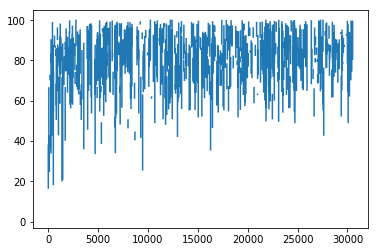

In [6]:
%matplotlib inline
repro[repro > 0]['agi_tokens'].plot()

The config file for the THOB scenario (which you can run yourself if you choose) contains similar parameters like the OHTB one, except for the numbers for each type of agents, as we see below in `blackboard_agents`:

In [7]:
with open('twohumansonebot.json') as json_file:  
    config = json.load(json_file)
    print(json.dumps(config['parameters'], indent=2))

{
  "label": "two humans one bot",
  "output_path": "twohumansonebot/",
  "sign_size": 8,
  "num_trade_plans": 10,
  "item_size": 8,
  "num_tests": 5,
  "min_token_price": 1,
  "max_token_price": 100,
  "max_iterations": 100000000000,
  "chance_of_stop_codon": 0.1,
  "seed": 35,
  "stochastic_copies": 1,
  "recursive_trade_depth_limit": 10,
  "buyers_weight": 0.5,
  "agent_parameters": {
    "SISTER": {
      "sigma": 0.4,
      "elitist": false,
      "fitness_weights": {
        "agi_tokens": 1,
        "buyer_score": 150,
        "seller_score": 100
      }
    },
    "Exogenous": {}
  },
  "random_agents": {},
  "blackboard_agents": [
    2,
    1,
    0,
    0,
    0
  ]
}


In [8]:
import pandas as pd
repro1 = pd.read_csv("twohumansonebotSigma4/reproduction_report.csv", delimiter=";")
repro1.head ()

,time,agent,label,utility,agi_tokens,buyer_score,seller_score,sign_displayed
0,0.0,2,"Does everything but poorly, SISTER Agent 2",0.000000,0.000000,0.0,0.000000,"[0.3154324446561476, 0.8705185656889035, 0.073..."
1,0.0,0,"Cluster Seeking Human, SISTER Agent 0",0.000000,0.000000,0.0,0.000000,"[0.45805494822409054, 0.30834960696491165, 0.2..."
2,0.0,1,"Cluster Seeking Human, SISTER Agent 1",0.000000,0.000000,0.0,0.000000,"[0.5309036810836607, 0.4718650906745474, 0.660..."
3,1.0,2,"Does everything but poorly, SISTER Agent 2",114.915932,61.884115,0.0,0.530318,"[0.3426978137610498, 0.367478342145237, 0.0987..."
4,1.0,0,"Cluster Seeking Human, SISTER Agent 0",0.000000,0.000000,0.0,0.000000,"[0.9075887866293313, 0.7350357837929654, 0.642..."


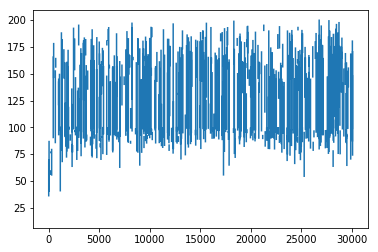

In [10]:
repro1[repro1 > 0]['agi_tokens'].plot()

In this scenario where we have held everything else the same except price evolution, the price is higher because the bot is dearer, according to the laws of supply and demand.

Next, we examine a final scenario in which only price can fluctuate and demonstrates the market process.
It is a scenario with a cluster-seeking human, an agent that does everything by itself, an agent that purchases specialists, and two different specialists.
The agent that purchases specialists does only slightly better than the agent that does everything itself, but it has to pay its two suppliers.
In this run to 202673 iterations, we see coevolutionary price dynamics.

In [11]:
import json
with open('oneofeach.json') as json_file:  
    config = json.load(json_file)
    print(json.dumps(config['blackboard'], indent=2))

[
  {
    "type": "SISTER",
    "distributes": true,
    "label": "Cluster Seeking Human",
    "trades": [
      {
        "type": "buy",
        "item": "clusterer_stop",
        "tests": [
          {
            "stophere": false,
            "test": "test_clusterer_silhouette",
            "data": "data_freetext_short",
            "threshold": 0.5,
            "hidden": false
          },
          {
            "stophere": true
          }
        ]
      },
      {
        "type": "stop"
      }
    ]
  },
  {
    "type": "SISTER",
    "distributes": false,
    "label": "Does everything but poorly",
    "trades": [
      {
        "type": "sell",
        "item": "clusterer_nltk_kmeans_20clusters",
        "tests": [
          {
            "stophere": true,
            "test": "test_clusterer_silhouette",
            "data": "data_freetext_internetResearchAgencyTweets",
            "hidden": false
          },
          {
            "stophere": true
          }
        ]
      

In [51]:
import pandas as pd
repro2 = pd.read_csv("oneofeach1/reproduction_report.csv", delimiter=";")
repro2.head ()

,time,agent,label,utility,agi_tokens,buyer_score,seller_score,sign_displayed
0,0.0,0,"Cluster Seeking Human, SISTER Agent 0",0.0,0.0,0.0,0.0,"[0.093108286671858, 0.9716559199897875, 0.4838..."
1,0.0,1,"Does everything but poorly, SISTER Agent 1",0.0,0.0,0.0,0.0,"[0.1669026437977721, 0.07350307047953974, 0.35..."
2,0.0,4,"preprocessor specialist, SISTER Agent 4",0.0,0.0,0.0,0.0,"[0.25390393017330004, 0.4454885434051805, 0.66..."
3,0.0,3,"Clusterer/vectorspace combo specialist, SISTER...",0.0,0.0,0.0,0.0,"[0.1786350922356743, 0.6714341761837008, 0.021..."
4,0.0,2,Purchases clusterer/vector space combo and pr...,0.0,0.0,0.0,0.0,"[0.6734853447629706, 0.2854277232300849, 0.267..."


In [52]:
repro2['time'].max()



202673.99998244355

The average incomes for the last 2000 iterations for the human, the agent that does all itself, the purchaser agent, and the supplier are listed under their income plots for the entire run:

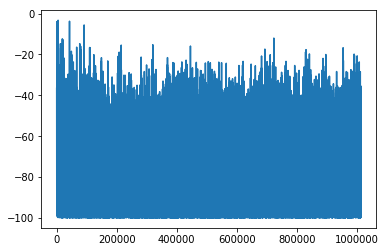

In [53]:
# Human agent
repro2.loc[(repro2['agent'] == 0)&(repro2['agi_tokens'] != 0) ]['agi_tokens'].plot()

In [54]:
repro2.loc[(repro2['agent'] == 0)&(repro2['agi_tokens'] < 0)&(repro2['time'] > 200000) ]['agi_tokens'].mean()

-79.17274323143145

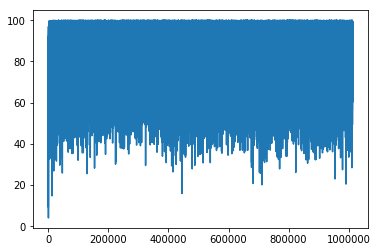

In [55]:
# Bot that does all itself
repro2.loc[(repro2['agent'] == 1)&(repro2['agi_tokens'] != 0) ]['agi_tokens'].plot()

In [56]:
repro2.loc[(repro2['agent'] == 1)&(repro2['agi_tokens'] > 0)&(repro2['time'] > 200000) ]['agi_tokens'].mean()

82.78968990310473

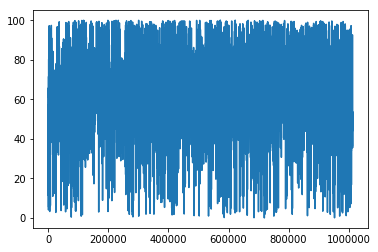

In [57]:
# Bot that buys from others
repro2.loc[(repro2['agent'] == 2)&(repro2['agi_tokens'] > 0) ]['agi_tokens'].plot()

In [58]:
repro2.loc[(repro2['agent'] == 2)&(repro2['agi_tokens'] > 0)&(repro2['time'] > 200000) ]['agi_tokens'].mean()

57.05772099722442

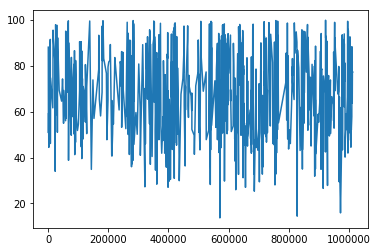

In [59]:
# Specialist bot
repro2.loc[(repro2['agent'] == 3)&(repro2['agi_tokens'] > 0) ]['agi_tokens'].plot()

In [60]:
repro2.loc[(repro2['agent'] == 3)&(repro2['agi_tokens'] > 0)&(repro2['time'] > 200000) ]['agi_tokens'].mean()

65.93853298009684

We can see that the purchaser agent makes less because he has to pay its suppliers.
Occasionally, instead of hiring specialists, it hires the agent that does it all for himself.
This information can be found by close examination of the log files that are generated each run.
The `log*.json` output log files in the `logs` directory tell which agents bought what from which other agents.
Output logs are printed in the next example.

We have demonstrated market pricing dynamics, while holding all else equal.
Now we let things free and observe market dynamics, while choosing and parameterizing software.
Although the ability for agents to hire agents is implemented and often happens in free running scenarios, to optimize parameters we do not need agents to hire other agents.
We can encode generalities of what we want in single agents, and let the rest evolve.
Although coevolution isn't really needed for simple parametezation and choosing, it will be needed in the future for more complicated software groupings to self organize.

In this scenario, we have many humans that require different software clusterings, but only three agents to fulfill needs.
Note that the first 5 human agents ask for a "clusterer_stop", meaning that they want a clusterer.
The software will prevent them from evolving the request for a more specific clusterer.
On the other hand, for the final agent description in the config file, of which three agents are created, we just denote "clusterer" without the "stop", meaning that the agent will evolve the details of a more specific clusterer.

In [12]:
import json
with open('competingClusterers.json') as json_file:  
    config = json.load(json_file)
print(json.dumps(config['blackboard'], indent=2))
print(json.dumps(config['parameters'], indent=2))

[
  {
    "type": "SISTER",
    "distributes": true,
    "label": "Cluster Seeking Human for IRA",
    "trades": [
      {
        "type": "buy",
        "item": "clusterer_stop",
        "tests": [
          {
            "stophere": false,
            "test": "test_clusterer_stop",
            "data": "data_freetext_internetResearchAgencyTweets",
            "hidden": false
          },
          {
            "stophere": true
          }
        ]
      },
      {
        "type": "stop"
      }
    ]
  },
  {
    "type": "SISTER",
    "distributes": true,
    "label": "Cluster Seeking Human for Facebook",
    "trades": [
      {
        "type": "buy",
        "item": "clusterer_stop",
        "tests": [
          {
            "stophere": false,
            "test": "test_clusterer_stop",
            "data": "data_freetext_internetResearchAgencyFacebook",
            "hidden": false
          },
          {
            "stophere": true
          }
        ]
      },
      {
        "

After running the simulation, we realize that three bot agents developed software to sell to only one of the human agents.
A close examination of the pickles generated for each agent show that only one of the software, the Trumptweets, had data output from the taggers that we have set.
This is because the emoji stripper that we have forced all agents to use is only compatable with the Trumptweets dataset.
Because we inserted our knowledge of what matches with what in the simulation, instead of letting such knowledge evolve on its own, five of our datasets did not get processed.
This is exactly the kind of human labor that the SingularityNET simulation is supposed to replace, when we don't insert our knowledge in by clamping values.
So now we have a scenario between one human and three bots.

In [13]:
import pandas as pd
repro3 = pd.read_csv("competingClusterers1/reproduction_report.csv", delimiter=";")
repro3.head ()

,time,agent,label,utility,agi_tokens,buyer_score,seller_score,sign_displayed
0,0.0,1,"Cluster Seeking Human for Facebook, SISTER Age...",0.0,0.0,0.0,0.0,"[0.42568419349123143, 0.16030632562475466, 0.0..."
1,0.0,7,"Cluster and Vector Space Optimizer, SISTER Age...",0.0,0.0,0.0,0.0,"[0.3819438129178536, 0.9152245550133943, 0.056..."
2,0.0,2,"Cluster Seeking Human for Trump Tweets, SISTER...",0.0,0.0,0.0,0.0,"[0.9494826133321456, 0.8858398264856449, 0.907..."
3,0.0,6,"Cluster and Vector Space Optimizer, SISTER Age...",0.0,0.0,0.0,0.0,"[0.22230357679924218, 0.3725325144988635, 0.25..."
4,0.0,5,"Cluster Seeking Human for Political Tweets, SI...",0.0,0.0,0.0,0.0,"[0.7172375757598571, 0.35249775532363103, 0.71..."


In [14]:
repro3['time'].max()

12009.999999992375

"Seller" and "buyer" scores are utilities that indicate the quality of software being bought or sold.
In this scenario, all three agents sell the same quality of software, indicating their response to selective pressure from the human agent.
The reason we see scores around 0.5 and scores around 0.2 in the following charts is that the same software is being subject to two different tests, one of which scores the software around 0.5, and the other of which scores the software around 0.2.
This can be seen through inspection of the logs file, next.
But more importantly, not only are all three software of the same quality, but two agents came up with very similar software, as we shall see.
Agents 7 and 8 came up with similar software that was close to the optimal, while agent 6 came up with slightly better software.
As there are over one hundred combinations of possible software choices and parameters, this would be an unlikely coincidence.
Rather, it shows that two agents have learned to offer the same things.
Remember, each agent has its own CMA-ES which is blind to everything except price and sign, and are unable to copy other agents.  

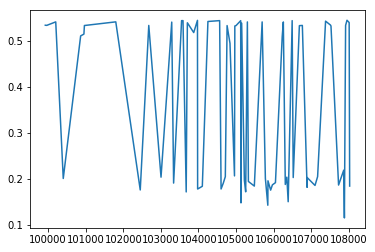

In [15]:
repro3.loc[(repro3['agent'] == 2)&(repro3['buyer_score'] > 0)&(repro3['time'] > 11000) ]['buyer_score'].plot()

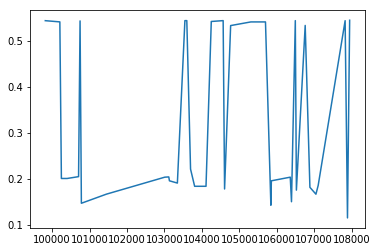

In [16]:
repro3.loc[(repro3['agent'] == 6)&(repro3['seller_score'] > 0)&(repro3['time'] > 11000) ]['seller_score'].plot()

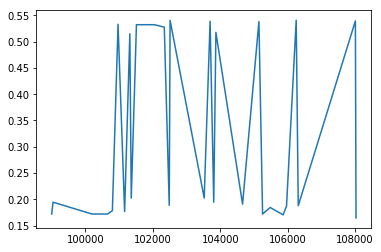

In [17]:
repro3.loc[(repro3['agent'] == 7)&(repro3['seller_score'] > 0)&(repro3['time'] > 11000) ]['seller_score'].plot()

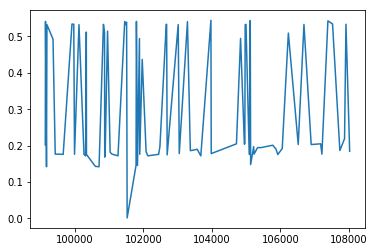

In [18]:
repro3.loc[(repro3['agent'] == 8)&(repro3['seller_score'] > 0)&(repro3['time'] > 11000) ]['seller_score'].plot()

We now show the log files from the latest runs of the three agents.
Each log contains the chosen software, under the keyword "code"; we also include it below for convenience.
We present the test results of each agent, showing test scores.
We see that the human has learned a very low threshold, so that it can use software that passes the test, but has the lower set of scores.  

The log files are similar in form to the input file, and in fact can be used as an input file to pick up where we started off from.
Additionally, they also store results for tested software, prices, and the software itself.
Where agents have created emergent functions (which appear in the agent emergent function registry), the log includes the compiled version, where emergent functions are converted back to the software in the human registry.
One can get the actual results (such as the preprocessed data, vector space, and cluster results) from the pickle directory.

In [19]:
import json
with open('competingClusterers1/logs/log11993.999999992551.txt') as json_file:  
    config = json.load(json_file)
    print(json.dumps(config, indent=2))

[
  {
    "type": "SISTER",
    "label": "Cluster Seeking Human for IRA, SISTER Agent 0",
    "distributes": true,
    "sign": [
      0.3759771869615248,
      0.18369717230604687,
      0.7411169957209327,
      0.3806177151285728,
      0.47785021194387767,
      0.9981312451645612,
      0.998748343355232,
      0.4138729481024045
    ],
    "trades": [
      {
        "type": "buy",
        "sign": [
          0.010482299840064886,
          0.4977276155627157,
          0.3124200961229693,
          0.6970987955182057,
          0.799672008510967,
          0.19850896566343101,
          0.7143738741552874,
          0.1520160606425951
        ],
        "item": "clusterer_stop",
        "midpoint": 95.3505115188048,
        "range": 73.11027836009373,
        "tests": [
          {
            "stophere": false,
            "test": "test_clusterer_calinskiHarabaz",
            "data": "data_freetext_internetResearchAgencyTweets",
            "threshold": 0.9961402227766875,
    

We paste in the relevent portions of the code for your convenience.
First the test result, then the optimized code:
```
{
            "stophere":false,
            "test":"test_clusterer_silhouette",
            "data":"data_freetext_trumpTweets",
            "threshold":0.08381733258756274,
            "hidden":false,
            "results":[
              {
                "offer":0,
                "score":0.5445157292961424,
                "time":11993.09090908347,
                "test":"test_clusterer_silhouette",
                "data":"data_freetext_trumpTweets"
              }
            ]
          },
 "chosen":0, (agent 6)
        "price":61.651894203013555,
        "code":{
          "f9004561_test_clusterer_silhouette":[
            "f9004562_clusterer_nltk_agglomerative_10clusters"
          ],
          "f9004562_clusterer_nltk_agglomerative_10clusters":[
            "f9004563_vectorSpace_gensim_doc2vec_50size_1000iterations_5minFreq"
          ],
          "f9004563_vectorSpace_gensim_doc2vec_50size_1000iterations_5minFreq":[
            "f9004564_preprocessor_freetext_tag"
          ],
          "f9004564_preprocessor_freetext_tag":[
            "f9004565_preprocessor_freetext_strip"
          ],
          "f9004565_preprocessor_freetext_strip":[
            "f9004566_preprocessor_freetext_shuffle_stochastic0"
          ],
          "f9004566_preprocessor_freetext_shuffle_stochastic0":[
            "f9004567_data_freetext_trumpTweets"
          ],
          "f9004567_data_freetext_trumpTweets":[]
        }
      },
```

In [20]:
import json
with open('competingClusterers1/logs/log12000.999999992475.txt') as json_file:  
    config = json.load(json_file)
    print(json.dumps(config, indent=2))

[
  {
    "type": "SISTER",
    "label": "Cluster Seeking Human for IRA, SISTER Agent 0",
    "distributes": true,
    "sign": [
      0.23177426094954223,
      0.13002723701891272,
      0.9913949947593846,
      0.09198806041972715,
      0.7908965191762909,
      0.9944414621770592,
      0.9992856472152282,
      0.45419253760817424
    ],
    "trades": [
      {
        "type": "buy",
        "sign": [
          0.20562660302791613,
          0.29534430453275184,
          0.4029198021117949,
          0.6898709068547866,
          0.22414101276576093,
          0.25424489066337863,
          0.39107595273068996,
          0.7771601617901487
        ],
        "item": "clusterer_stop",
        "midpoint": 77.59606540157489,
        "range": 82.5428607645608,
        "tests": [
          {
            "stophere": false,
            "test": "test_clusterer_calinskiHarabaz",
            "data": "data_freetext_internetResearchAgencyTweets",
            "threshold": 0.9735047858961112

We paste in the relevent portions of the code for your convenience.
First the test result, then the optimized code:
```
    {
            "stophere":false,
            "test":"test_clusterer_silhouette",
            "data":"data_freetext_trumpTweets",
            "threshold":0.09628692690671559,
            "hidden":false,
            "results":[
              {
                "offer":1,
                "score":0.539507786175579,
                "time":12000.090909083394,
                "test":"test_clusterer_silhouette",
                "data":"data_freetext_trumpTweets"
              }
            ]
          },
"chosen":1, (agent 7)
        "price":83.95450625309168,
        "code":{
          "f9008144_test_clusterer_silhouette":[
            "f9008145_clusterer_nltk_kmeans_20clusters"
          ],
          "f9008145_clusterer_nltk_kmeans_20clusters":[
            "f9008146_vectorSpace_gensim_doc2vec_200size_1000iterations_5minFreq"
          ],
          "f9008146_vectorSpace_gensim_doc2vec_200size_1000iterations_5minFreq":[
            "f9008147_preprocessor_freetext_tag"
          ],
          "f9008147_preprocessor_freetext_tag":[
            "f9008148_preprocessor_freetext_strip"
          ],
          "f9008148_preprocessor_freetext_strip":[
            "f9008149_preprocessor_freetext_shuffle_stochastic0"
          ],
          "f9008149_preprocessor_freetext_shuffle_stochastic0":[
            "f9008150_data_freetext_trumpTweets"
          ],
          "f9008150_data_freetext_trumpTweets":[]
        }
      },
```

In [21]:
import json
with open('competingClusterers1/logs/log12001.999999992464.txt') as json_file:  
    config = json.load(json_file)
    print(json.dumps(config, indent=2))

[
  {
    "type": "SISTER",
    "label": "Cluster Seeking Human for IRA, SISTER Agent 0",
    "distributes": true,
    "sign": [
      0.27612189854173597,
      0.0776506179644515,
      0.9910687381218269,
      0.13810735283471307,
      0.2084413927371811,
      0.9521253815140858,
      0.7345378143204349,
      0.12423564967351514
    ],
    "trades": [
      {
        "type": "buy",
        "sign": [
          0.0015195918862173732,
          0.11780683266410463,
          0.07078417648491375,
          0.2860800566355254,
          0.25398913407884527,
          0.38245252304944366,
          0.6723242074019327,
          0.08708816997074731
        ],
        "item": "clusterer_stop",
        "midpoint": 13.95635471141011,
        "range": 65.05582932869766,
        "tests": [
          {
            "stophere": false,
            "test": "test_clusterer_silhouette",
            "data": "data_freetext_internetResearchAgencyTweets",
            "threshold": 0.978654668284792,
 

We paste in the relevent portions of the code for your convenience.
First the test result, then the optimized code:
```
	  {
            "stophere":false,
            "test":"test_clusterer_calinskiHarabaz",
            "data":"data_freetext_trumpTweets",
            "threshold":0.03973031987082828,
            "hidden":false,
            "results":[
              {
                "offer":2,
                "score":0.18431594763039333,
                "time":12001.090909083383,
                "test":"test_clusterer_calinskiHarabaz",
                "data":"data_freetext_trumpTweets"
              }
            ]
          },
    "chosen":2, (agent 8)
        "price":93.80560044547406,
        "code":{
          "f9008796_test_clusterer_calinskiHarabaz":[
            "f9008797_clusterer_nltk_kmeans_20clusters"
          ],
          "f9008797_clusterer_nltk_kmeans_20clusters":[
            "f9008798_vectorSpace_gensim_doc2vec_300size_200iterations_5minFreq"
          ],
          "f9008798_vectorSpace_gensim_doc2vec_300size_200iterations_5minFreq":[
            "f9008799_preprocessor_freetext_tag"
          ],
          "f9008799_preprocessor_freetext_tag":[
            "f9008800_preprocessor_freetext_strip"
          ],
          "f9008800_preprocessor_freetext_strip":[
            "f9008801_preprocessor_freetext_shuffle_stochastic0"
          ],
          "f9008801_preprocessor_freetext_shuffle_stochastic0":[
            "f9008802_data_freetext_trumpTweets"
          ],
          "f9008802_data_freetext_trumpTweets":[]
        }
      },
```

The chosen agent is typed by hand in these examples, but one may find what agent is chosen by looking at the offer number, above the chosen software code.

A search on the output file shows the agent constructed emergent Python software.
The numbers in front of the software are call numbers, so that two different calls of the same function may be differentiated.
This software is relatively high scoring, as we know as well from the baseline notebook.

In conclusion, we have seen in this notebook an agent society choose and parameterize software through feedback between models through the price and sign signals.
We have shown they are able to use coevolutionary CMA-ES to optimize their software quality scores.
In this example, we have subjected software to two tests, and to survive it had to adapt itself to both.
But what if it was subjected to the tests of the successes of thousands of customers?
Or to the tests of the millions of customers which those thousands of customers use themselves?
It makes sense that we would obtain a better test, from an unsupervised learning method, whose tests are generally poor and take human labor in practice.
We have thus found a way to combine not only tests, but sucessful tests of customers and so on and so forth, to present better software, even before human reputation scores are taken into account.

Feedback through the price signal can take more complex forms.
For example, it can be used to fit a causal model to data, and in doing so, improve the parse of data.
We will explore one such appliction in our next notebook.